Importación de librerias

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split as tts


Importación de csvs

In [204]:
gasnatural = pd.read_csv('clean_data/gasnatural_clean.csv')
uranio = pd.read_csv('clean_data/uranio_clean.csv')
renovables = pd.read_csv('clean_data/renovables_clean.csv')
euaspot = pd.read_csv('clean_data/euaspot.csv')
demanda = pd.read_csv('clean_data/demanda.csv')

In [205]:
gasnatural = gasnatural.drop('Unnamed: 0', axis=1)
uranio = uranio.drop('Unnamed: 0', axis=1)
renovables = renovables.drop('Unnamed: 0', axis=1)
euaspot = euaspot.drop('Unnamed: 0', axis=1)
demanda = demanda.drop('Unnamed: 0', axis=1)


Limpiando eua SPOT

In [206]:
euaspot = euaspot[['value', 'date', 'weekend']]
# Convertir la columna "date" a tipo datetime
euaspot['date'] = pd.to_datetime(euaspot['date'])

# Filtrar a partir de 2020
euaspot = euaspot[euaspot['date'].dt.year >= 2020]

Mergeando

In [207]:
gasnatural.rename(columns={'Close': 'GasNatural'}, inplace=True)
uranio.rename(columns={'Close': 'Uranio'}, inplace=True)

In [208]:
demanda.rename(columns={'Fecha': 'Date'}, inplace=True)
renovables.rename(columns={'Fecha': 'Date'}, inplace=True)
euaspot.rename(columns={'date': 'Date'}, inplace=True)


In [209]:
# Convertir columnas "Date" a tipo "datetime" en cada dataframe
gasnatural['Date'] = pd.to_datetime(gasnatural['Date'])
uranio['Date'] = pd.to_datetime(uranio['Date'])
renovables['Date'] = pd.to_datetime(renovables['Date'])
euaspot['Date'] = pd.to_datetime(euaspot['Date'])
demanda['Date'] = pd.to_datetime(demanda['Date'])

In [210]:
# Combinar los dataframes utilizando la columna "date"
merged_df = pd.merge(demanda, gasnatural, on='Date', how='inner')
merged_df = pd.merge(merged_df, uranio, on='Date', how='inner')
merged_df = pd.merge(merged_df, renovables, on='Date', how='inner')
merged_df = pd.merge(merged_df, euaspot, on='Date', how='inner')


In [211]:
merged_df.tail()

,Date,Demanda,GasNatural,Uranio,Hidráulica,Eólica,Otras renovables,Residuos renovables,Solar,value,weekend
1240,2023-05-25,640.728355,2.610458,2.64,43.2906,200.653827,11.05631,1.992900,136.767077,65.545833,0
1241,2023-05-26,625.457526,2.545363,2.57,41.6624,210.392500,10.79782,2.282750,102.242471,86.415833,0
1242,2023-05-27,556.141015,2.505847,2.57,46.7669,83.687496,12.02782,2.365950,77.627623,84.942500,1
1243,2023-05-28,510.928902,2.587448,2.57,43.5155,49.557405,11.40592,2.354900,88.999581,95.802083,1
1244,2023-05-29,610.504707,2.688613,2.57,50.8219,58.580648,11.76121,2.397725,115.868949,92.531667,0


In [212]:
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Weekday'] = merged_df['Date'].dt.weekday
merged_df['Year'] = merged_df['Date'].dt.year



## Demanda vs Price

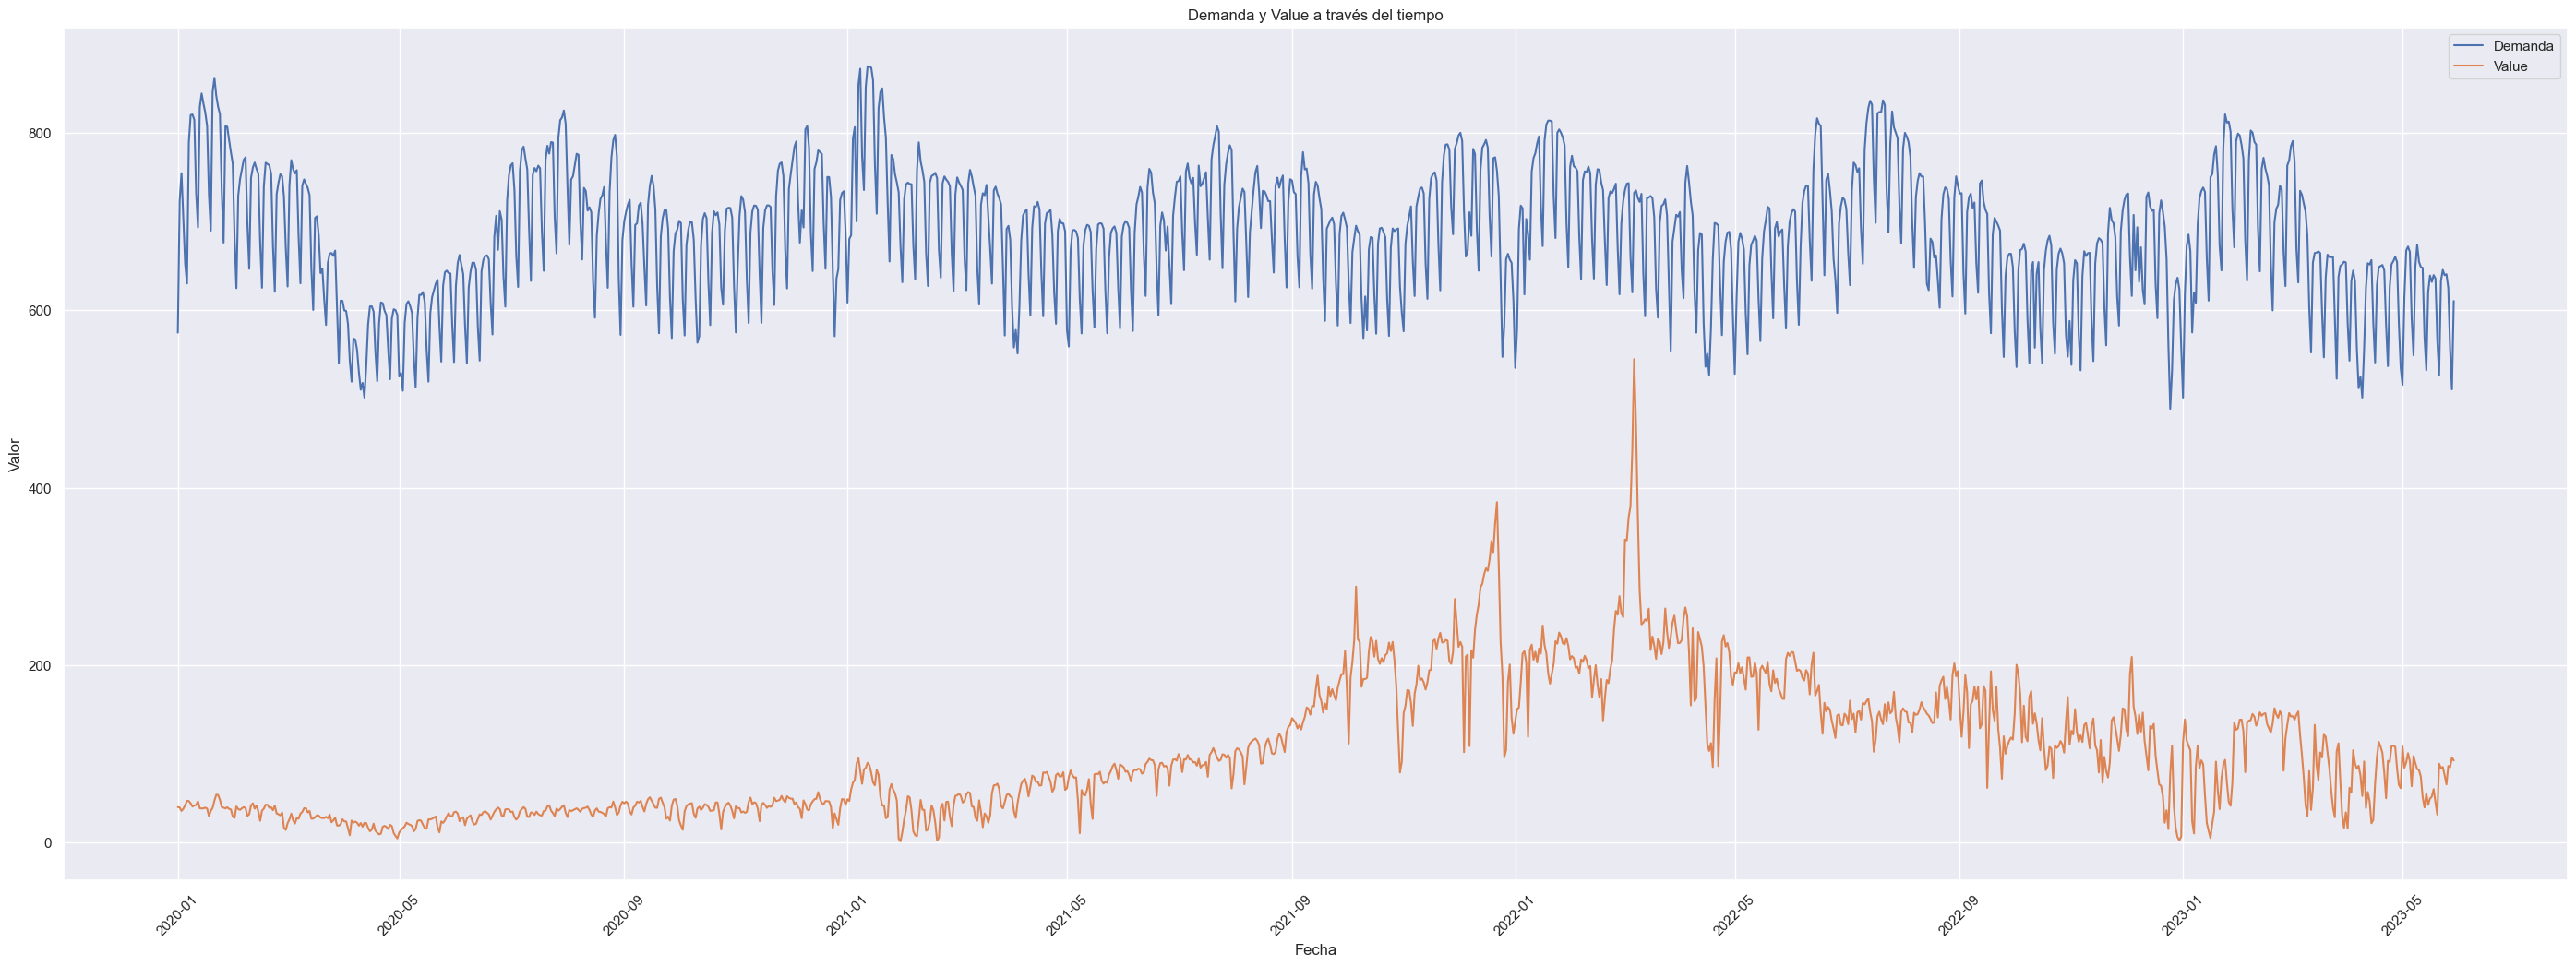

In [213]:
fig = plt.figure(figsize=(35,12))
sns.set_style("darkgrid")

# Graficar la columna "Demanda" utilizando Seaborn
sns.lineplot(data=merged_df, x='Date', y='Demanda', label='Demanda')

# Graficar la columna "value" utilizando Seaborn
sns.lineplot(data=merged_df, x='Date', y='value', label='Value')

# Configurar el título y las etiquetas de los ejes
plt.title('Demanda y Value a través del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

## Gas Natural vs Price

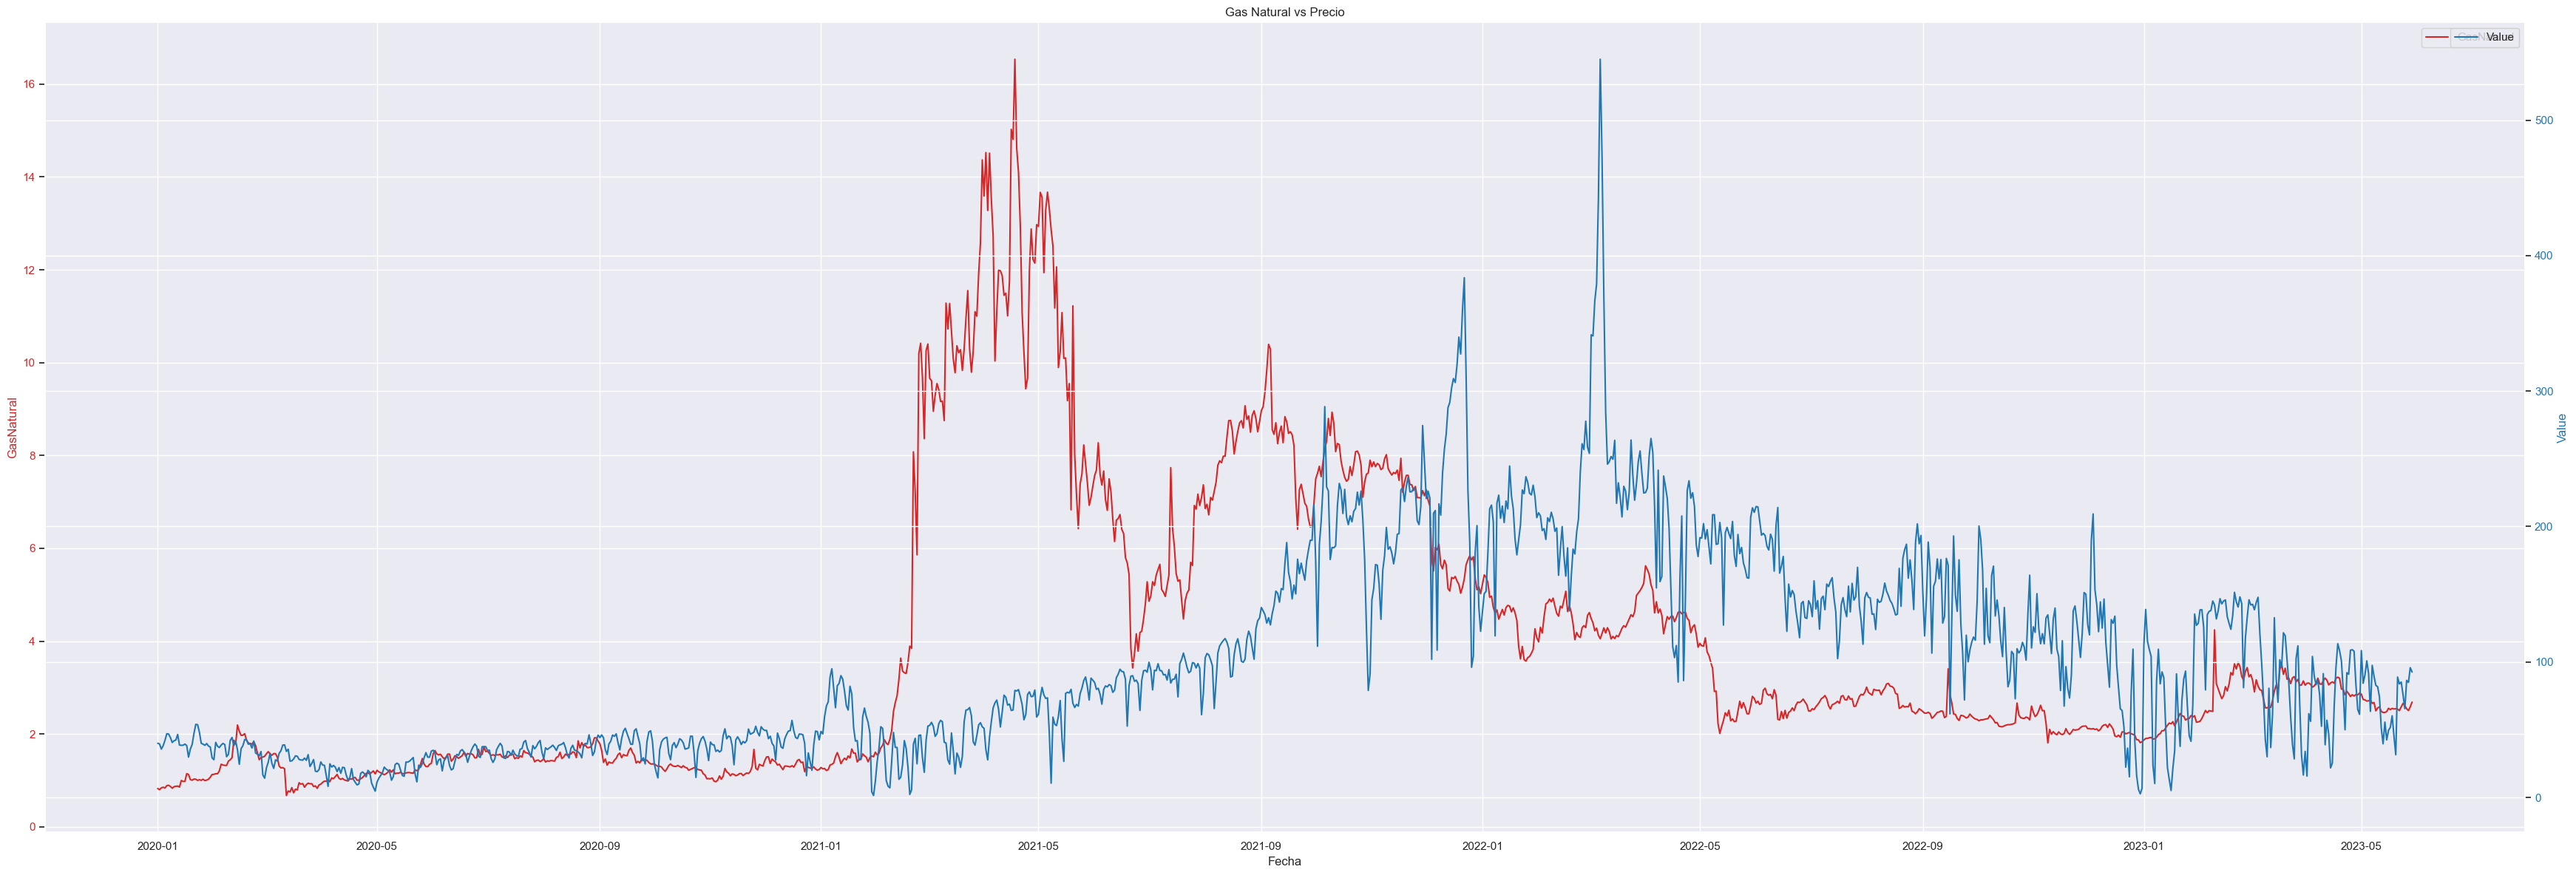

In [214]:
fig, ax1 = plt.subplots(figsize=(35, 12))
sns.set_style("darkgrid")

# Graficar la columna "GasNatural" en el primer eje
color1 = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('GasNatural', color=color1)
ax1 = sns.lineplot(data=merged_df, x='Date', y='GasNatural', label='GasNatural', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Crear el segundo eje y asignarlo a la columna "value"
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Value', color=color2)
ax2 = sns.lineplot(data=merged_df, x='Date', y='value', label='Value', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Configurar el título
plt.title('Gas Natural vs Precio')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Ajustar el espaciado entre subplots para evitar superposiciones
fig.tight_layout()

# Mostrar el gráfico
plt.show()


## Uranio vs Precio

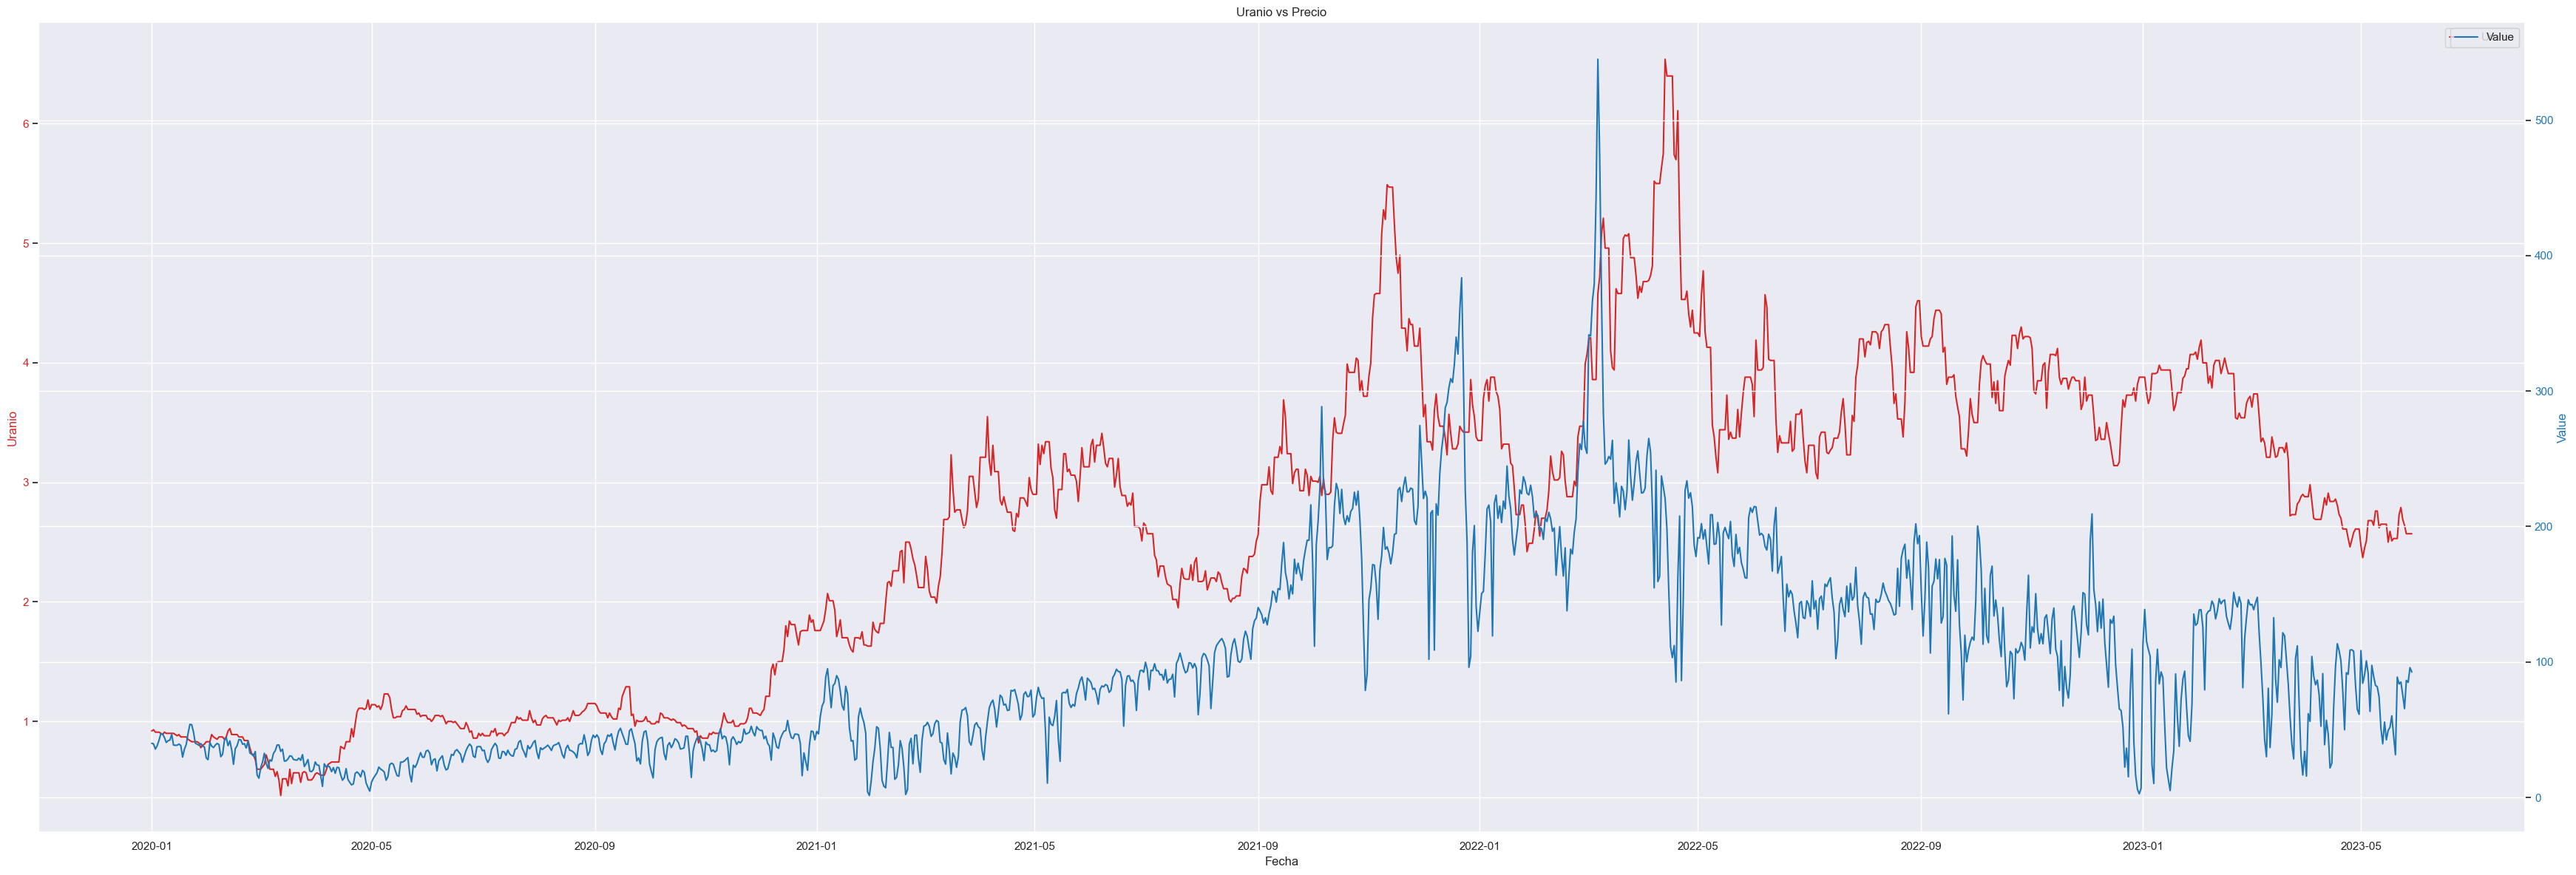

In [215]:
fig, ax1 = plt.subplots(figsize=(35, 12))
sns.set_style("darkgrid")

# Graficar la columna "GasNatural" en el primer eje
color1 = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Uranio', color=color1)
ax1 = sns.lineplot(data=merged_df, x='Date', y='Uranio', label='Uranio', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Crear el segundo eje y asignarlo a la columna "value"
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Value', color=color2)
ax2 = sns.lineplot(data=merged_df, x='Date', y='value', label='Value', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Configurar el título
plt.title('Uranio vs Precio')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Ajustar el espaciado entre subplots para evitar superposiciones
fig.tight_layout()

# Mostrar el gráfico
plt.show()

### Dickey-Fuller Test

In [216]:
y = merged_df['value']
adf_test = adfuller(y, regression='c')
print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(adf_test[0], adf_test[1], adf_test[2]))
for key, value in adf_test[4].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

ADF Statistic: -1.759151
p-value: 0.400922
#Lags used: 21
Critical Value (1%): -3.435708
Critical Value (5%): -2.863906
Critical Value (10%): -2.568030


Los resultados de la prueba de raíz unitaria (ADF) proporcionan información sobre la estacionariedad de una serie de tiempo. Aquí está la interpretación de los resultados:

- ADF Statistic: El valor de estadística ADF es -1.759151. Este valor negativo indica que la serie de tiempo tiene una tendencia decreciente, pero no nos dice si es estacionaria o no.

- p-value: El valor p obtenido es 0.400922. Este valor representa la probabilidad de obtener un valor de estadística ADF igual o más extremo que el observado, si la serie de tiempo fuera en realidad no estacionaria. En este caso, el valor p es mayor que el nivel de significancia comúnmente utilizado de 0.05. Por lo tanto, no tenemos suficiente evidencia para rechazar la hipótesis nula de que la serie de tiempo tiene una raíz unitaria y no es estacionaria.

- #Lags used: El número de rezagos utilizados en la prueba es 21. Los rezagos se incluyen en la prueba para capturar la dependencia temporal en la serie de tiempo.

- Critical Values: Estos valores representan los límites críticos correspondientes a diferentes niveles de confianza. Si el valor de estadística ADF es menor que estos valores críticos, podemos rechazar la hipótesis nula de no estacionariedad. En este caso, el valor de estadística ADF (-1.759151) es mayor que los valores críticos para todos los niveles de confianza (1%, 5% y 10%). Esto respalda aún más la idea de que la serie de tiempo no es estacionaria.

En resumen, los resultados indican que la serie de tiempo no es estacionaria, ya que no hay suficiente evidencia para rechazar la hipótesis nula de presencia de una raíz unitaria.

### Correlaciones

In [217]:
# Find the correlations between the energy price and the rest of the features

correlations = merged_df.corr(method='pearson')
print(correlations['value'].sort_values(ascending=False).to_string())

value                  1.000000
Uranio                 0.711761
Year                   0.476235
Otras renovables       0.399773
Residuos renovables    0.363588
GasNatural             0.263190
Solar                  0.158603
Demanda                0.135016
Month                  0.110407
Eólica                -0.045288
weekend               -0.046961
Weekday               -0.054288
Hidráulica            -0.382716


C:\Users\river\AppData\Local\Temp\ipykernel_15688\3620804181.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = merged_df.corr(method='pearson')


### Eliminar outliers?


Instead of manually checking each and every time-series separately, we will automatically remove the outliers, by deleting all rows (observations) which are 4 standard deviation away from the mean of each time-series.

Automatic Outlier Removal

for feature in considered_features:
    mean_feat = df_final[feature].mean()
    stdev_feat = df_final[feature].std()
    upper_limit = mean_feat + 4 * stdev_feat
    lower_limit = mean_feat - 4 * stdev_feat
    df_final.loc[df_final[feature] > upper_limit, feature] = np.nan
    df_final.loc[df_final[feature] < lower_limit, feature] = np.nan
Number of removed values per column

df_final[considered_features].isnull().sum()
hour                       0
weekday                    0
month                      0
business hour              0
total load actual          0
generation fossil gas    152
generation coal all        0
generation biomass         4
pressure_Barcelona        62
wind_speed_Madrid         84
temp_range_Valencia      225
dtype: int64
There are no or only a few outliers in most features, with the exception of 'generation fossil gas' and 'temp_range_Valencia' from which we have ended up removing a large number of values.

Fill outlier rows using interpolation

df_final.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

### Creating a dataset with all variables standardized ((X-mu)/sigma)) in order to feed it to specific algorithms that require such
#pre-processing procedure (e.g. SVR).
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(pm_df)
standard_pm_df = scaler.transform(pm_df)
standard_pm_df = pd.DataFrame(data = standard_pm_df, index = None , columns = pm_df.columns)
standard_pm_df.head(12)

Ploting

In [218]:
merged_df.columns

Index(['Date', 'Demanda', 'GasNatural', 'Uranio', 'Hidráulica', 'Eólica',
       'Otras renovables', 'Residuos renovables', 'Solar', 'value', 'weekend',
       'Month', 'Weekday', 'Year'],
      dtype='object')

In [219]:
considered_features = ['Demanda', 'GasNatural', 'Uranio', 'Hidráulica', 'Eólica',
       'Otras renovables', 'Residuos renovables', 'Solar', 'weekend', 'Month', 'Weekday']

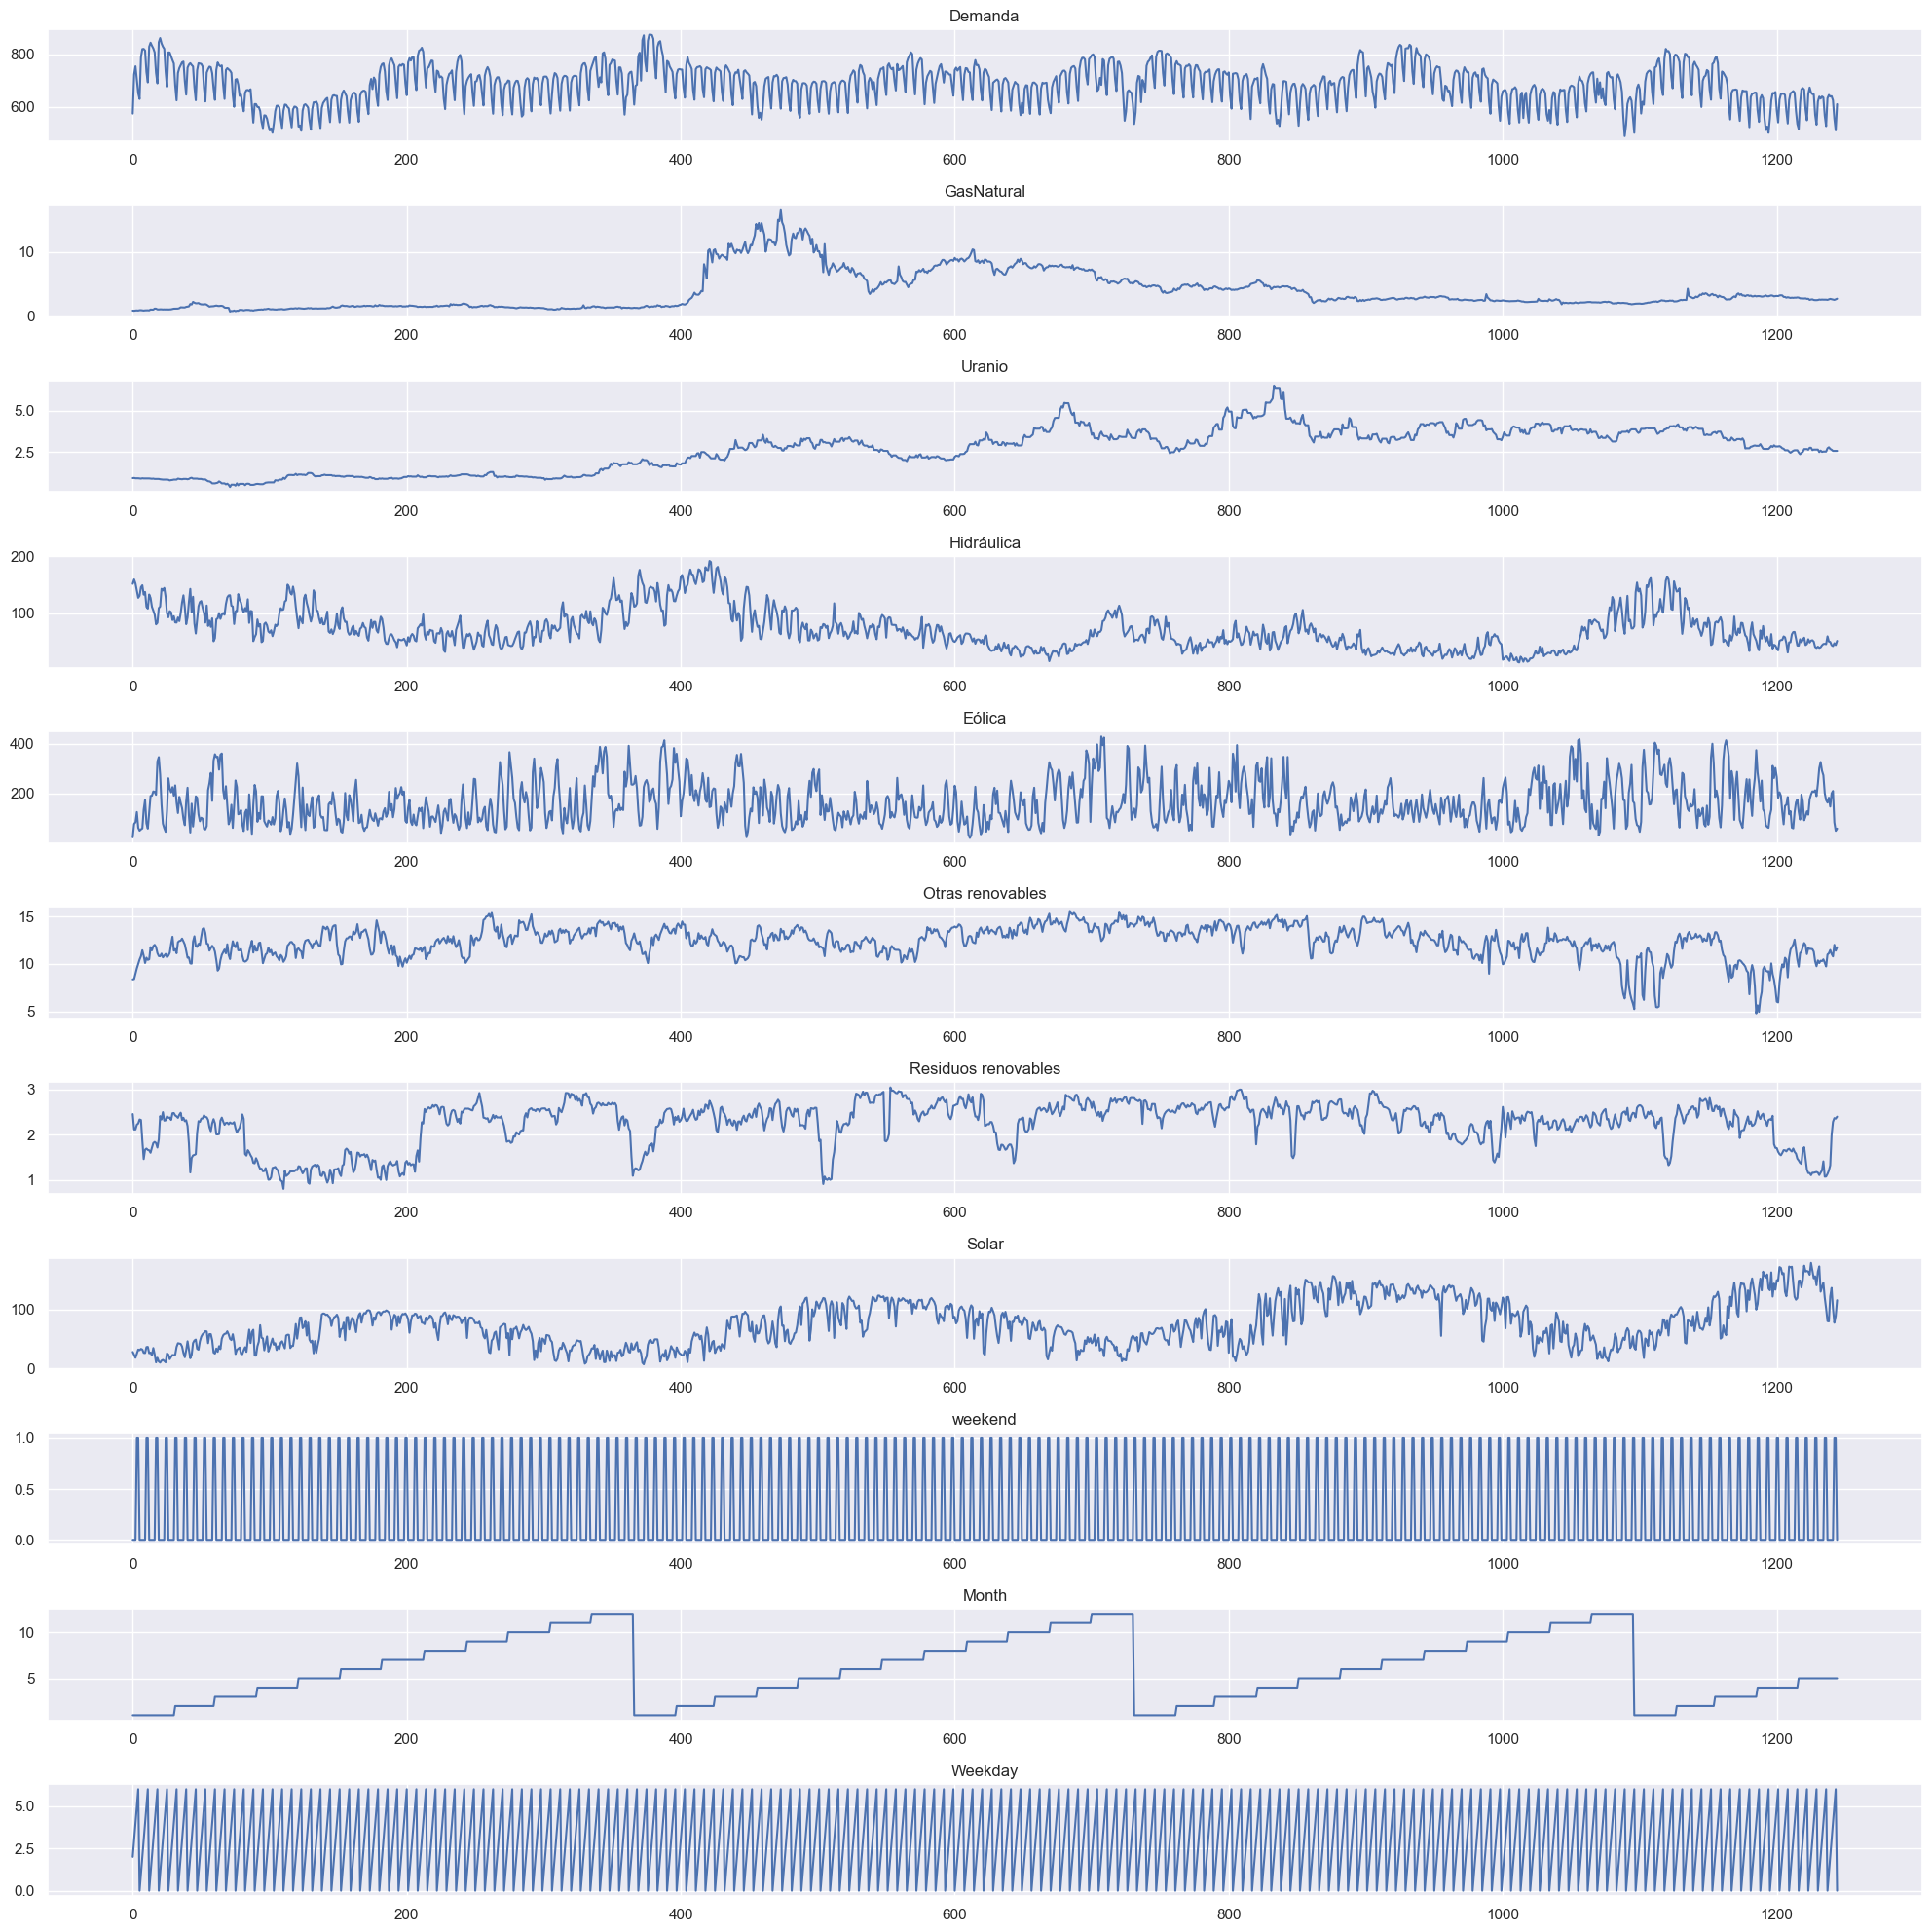

In [220]:
values = merged_df[considered_features].values

# Plot time-series of considered features
plt.figure(figsize=(20, 20))
for i in range(values.shape[1]):
    plt.subplot(values.shape[1], 1, i+1)
    plt.plot(values[:, i])
    plt.title(considered_features[i]) 
plt.tight_layout()
plt.show()


### Correlación y Autocorrelación

c:\Users\river\anaconda3\envs\ML\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


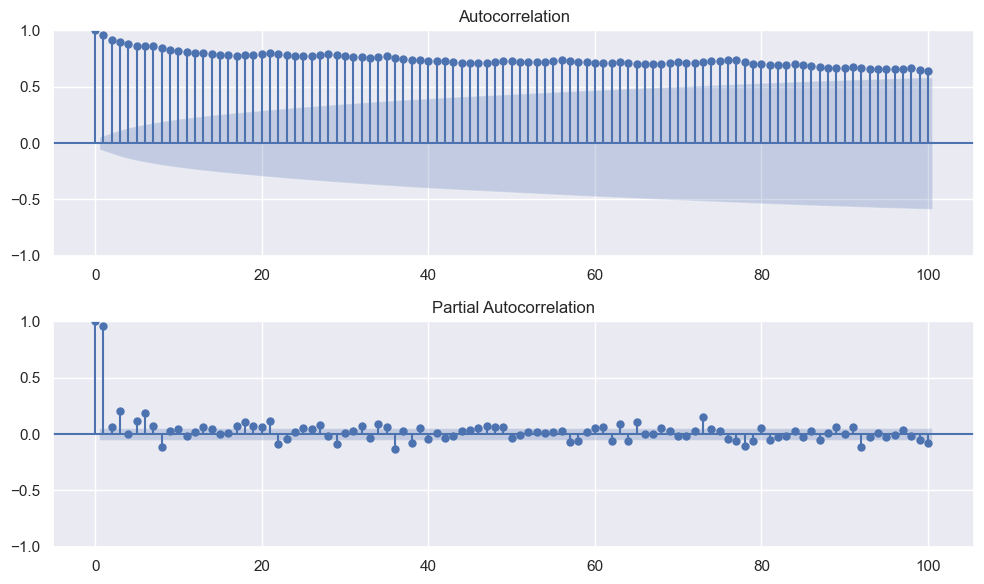

In [221]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))
plot_acf(merged_df['value'], lags=100, ax=ax1)
plot_pacf(merged_df['value'], lags=100, ax=ax2)
plt.tight_layout()
plt.show()

El gráfico de autocorrelación (ACF) y el gráfico de autocorrelación parcial (PACF) son herramientas que se utilizan para analizar la correlación y dependencia temporal en una serie de tiempo.

En el gráfico de autocorrelación (ACF), el eje x representa los lags, es decir, los desplazamientos en el tiempo. El eje y representa el valor de correlación entre la serie de tiempo y su versión desplazada. Cada barra en el gráfico de ACF representa la correlación entre la serie de tiempo y su versión desplazada en un lag específico. La altura de cada barra indica el nivel de correlación. Un ACF que decae gradualmente sugiere una serie de tiempo estacionaria, mientras que los picos significativos en el ACF pueden indicar una dependencia temporal.

En el gráfico de autocorrelación parcial (PACF), también se representa la correlación en función del lag. Sin embargo, en este caso, se eliminan los efectos indirectos de los lags intermedios. La altura de cada barra en el gráfico de PACF indica la correlación parcial entre la serie de tiempo y su versión desplazada en un lag específico, después de eliminar la influencia de los lags intermedios. Los picos significativos en el PACF pueden indicar componentes de autocorrelación directa en la serie de tiempo.

Un pico significativo en el ACF en el lag 1 indica una fuerte correlación entre los valores actuales y los valores en el período anterior. Un pico significativo en el PACF en el lag 1 indica una correlación directa entre los valores actuales y los valores en el período anterior, después de eliminar la influencia de los lags intermedios.

## Train Test Split

In [222]:
merged_df.columns

Index(['Date', 'Demanda', 'GasNatural', 'Uranio', 'Hidráulica', 'Eólica',
       'Otras renovables', 'Residuos renovables', 'Solar', 'value', 'weekend',
       'Month', 'Weekday', 'Year'],
      dtype='object')

In [223]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 0 to 1244
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1245 non-null   datetime64[ns]
 1   Demanda              1245 non-null   float64       
 2   GasNatural           1245 non-null   float64       
 3   Uranio               1245 non-null   float64       
 4   Hidráulica           1245 non-null   float64       
 5   Eólica               1245 non-null   float64       
 6   Otras renovables     1245 non-null   float64       
 7   Residuos renovables  1245 non-null   float64       
 8   Solar                1245 non-null   float64       
 9   value                1245 non-null   float64       
 10  weekend              1245 non-null   int64         
 11  Month                1245 non-null   int64         
 12  Weekday              1245 non-null   int64         
 13  Year                 1245 non-nul

In [224]:
X = merged_df.drop(columns=['value','Date', 'weekend', 'Weekday'], axis=1)

y = merged_df.value 

In [225]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       test_size=5,
                                       shuffle=False  # que no mezcle de manera aleatoria 
                                      )


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1240, 10), (5, 10), (1240,), (5,))

# 1. Random Forest Regressor

In [226]:
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.metrics import mean_squared_error as mse

In [227]:
rfr=RFR()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [228]:
y_pred = rfr.predict(X_test)

In [229]:
mse(y_test, y_pred, squared=False)  # RMSE

15.94340708918389

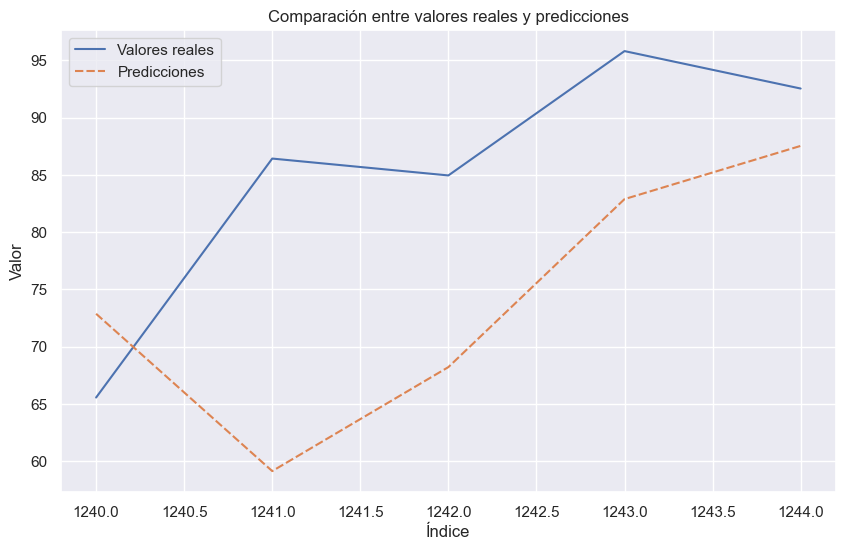

In [230]:
# Crear un dataframe con los valores reales y las predicciones
results_df = pd.DataFrame({'Valores reales': y_test, 'Predicciones': y_pred})

# Graficar los valores reales y las predicciones
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre valores reales y predicciones')
plt.show()

In [231]:
# Obtener todas las fechas excepto los últimos 5 registros
fechas_entrenamiento = merged_df['Date'][:-5]

# Obtener las últimas 5 fechas para el conjunto de prueba
fechas_prueba = merged_df['Date'][-5:]

# Crear un dataframe con las fechas y las predicciones
predicciones_df = pd.DataFrame({'Fecha': fechas_entrenamiento.append(fechas_prueba), 'Predicciones': np.concatenate((rfr.predict(X_train), y_pred))})

C:\Users\river\AppData\Local\Temp\ipykernel_15688\723488003.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicciones_df = pd.DataFrame({'Fecha': fechas_entrenamiento.append(fechas_prueba), 'Predicciones': np.concatenate((rfr.predict(X_train), y_pred))})


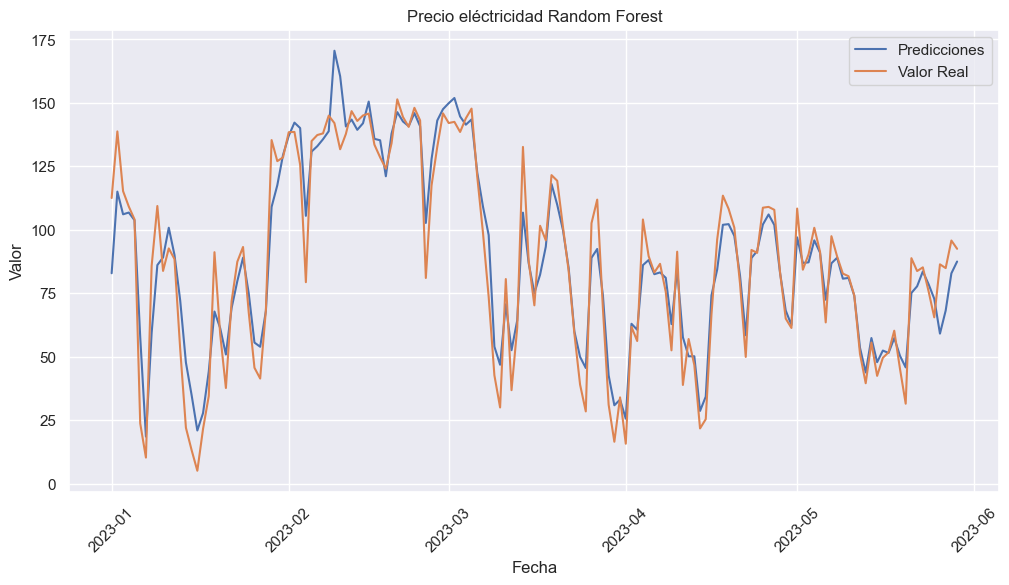

In [232]:
# Filtrar las fechas del año 2023
predicciones_2023 = predicciones_df[predicciones_df['Fecha'].dt.year == 2023]
merged_2023 = merged_df[merged_df['Date'].dt.year == 2023]

# Configurar estilo de seaborn
sns.set(style="darkgrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='Predicciones', data=predicciones_2023, label='Predicciones')
sns.lineplot(x='Date', y='value', data=merged_2023, label='Valor Real')

# Configurar etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Precio eléctricidad Random Forest')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


# 2. XGB Regressor

In [233]:
from xgboost import XGBRegressor as XGBR

In [234]:
xgbr=XGBR()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [235]:
y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

21.930585474910906

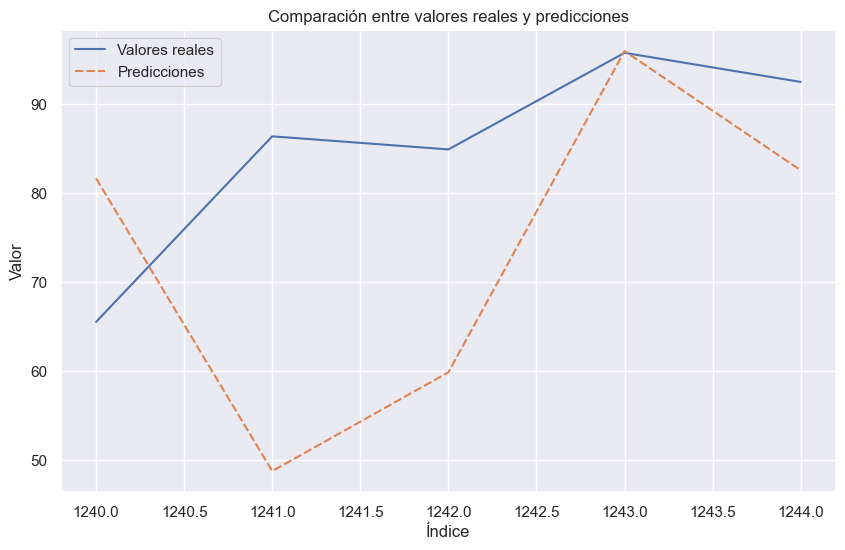

C:\Users\river\AppData\Local\Temp\ipykernel_15688\3931671542.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicciones_df = pd.DataFrame({'Fecha': fechas_entrenamiento.append(fechas_prueba), 'Predicciones': np.concatenate((rfr.predict(X_train), y_pred))})


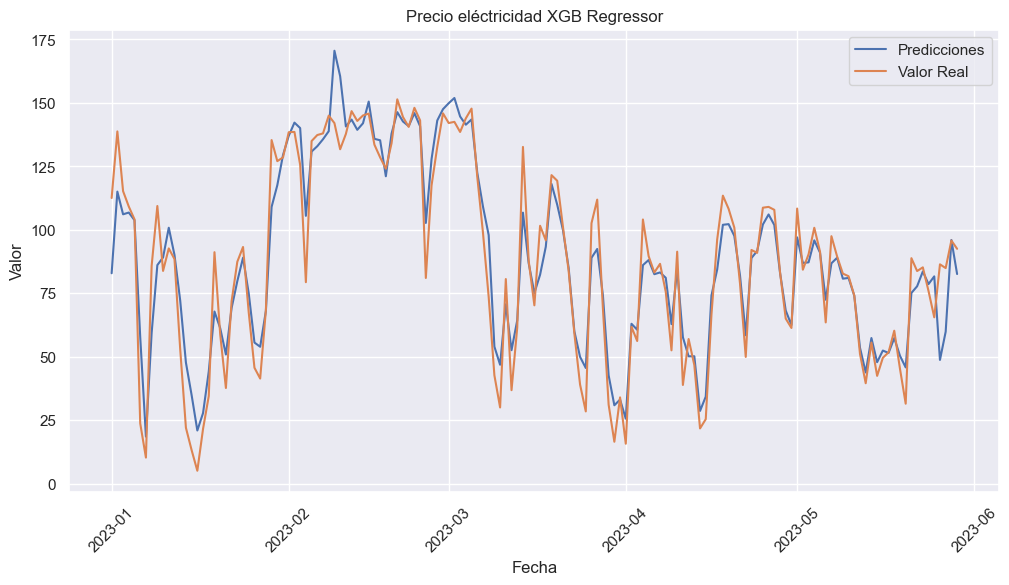

In [236]:
# Crear un dataframe con los valores reales y las predicciones
results_df = pd.DataFrame({'Valores reales': y_test, 'Predicciones': y_pred})

# Graficar los valores reales y las predicciones
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre valores reales y predicciones')
plt.show()

# Obtener todas las fechas excepto los últimos 5 registros
fechas_entrenamiento = merged_df['Date'][:-5]

# Obtener las últimas 5 fechas para el conjunto de prueba
fechas_prueba = merged_df['Date'][-5:]

# Crear un dataframe con las fechas y las predicciones
predicciones_df = pd.DataFrame({'Fecha': fechas_entrenamiento.append(fechas_prueba), 'Predicciones': np.concatenate((rfr.predict(X_train), y_pred))})
# Filtrar las fechas del año 2023
predicciones_2023 = predicciones_df[predicciones_df['Fecha'].dt.year == 2023]
merged_2023 = merged_df[merged_df['Date'].dt.year == 2023]

# Configurar estilo de seaborn
sns.set(style="darkgrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='Predicciones', data=predicciones_2023, label='Predicciones')
sns.lineplot(x='Date', y='value', data=merged_2023, label='Valor Real')

# Configurar etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Precio eléctricidad XGB Regressor')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


## Linear Regression

In [268]:
from sklearn.linear_model import LinearRegression as LinReg   # alias es mio
linreg=LinReg()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mse(y_test, y_pred, squared=False) 

21.094250071841635

# Intento de Red Neuronal

In [245]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor



IndexError: index 9 is out of bounds for axis 0 with size 9

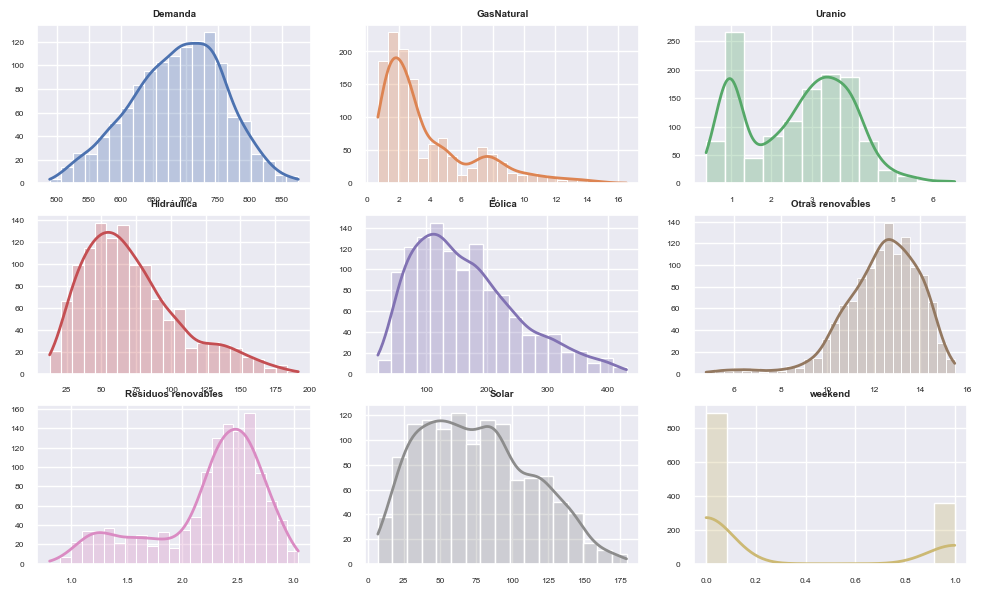

In [255]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = merged_df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('value')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = merged_df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Transformacion

In [239]:
merged_df.columns


Index(['Date', 'Demanda', 'GasNatural', 'Uranio', 'Hidráulica', 'Eólica',
       'Otras renovables', 'Residuos renovables', 'Solar', 'value', 'weekend',
       'Month', 'Weekday', 'Year'],
      dtype='object')

In [240]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

In [241]:
# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols)],
                    remainder='passthrough'
                )

In [242]:
# Se aprenden y aplican las transformaciones de preprocesado
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [243]:
labels = numeric_cols
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Demanda              1240 non-null   float64
 1   GasNatural           1240 non-null   float64
 2   Uranio               1240 non-null   float64
 3   Hidráulica           1240 non-null   float64
 4   Eólica               1240 non-null   float64
 5   Otras renovables     1240 non-null   float64
 6   Residuos renovables  1240 non-null   float64
 7   Solar                1240 non-null   float64
 8   Month                1240 non-null   float64
 9   Year                 1240 non-null   float64
dtypes: float64(10)
memory usage: 97.0 KB


In [259]:
# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

# "lbfgs" se utiliza para optimizar los pesos de la red neuronal durante el entrenamiento.

In [260]:
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing



In [263]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)], #una capa oculta con 10 neuronas otra con 20 y dos capas con 10 neuronas cada una
    'modelo__alpha': np.logspace(-3, 3, 10),  #controla la regularización, es decir el overfiteo
    'modelo__learning_rate_init': [0.001, 0.01], #tasa de aprendizaje 
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,  #modelo utilizado
        param_distributions = param_distributions,  #probar por cada parametro
        n_iter     = 50,  # numero de combinaciones de hiperparametros
        scoring    = 'neg_mean_squared_error',  # para evaluar
        n_jobs     = multiprocessing.cpu_count() - 1,  # todos los nucleos de la cpu - 1
        cv         = 5,  # validación cruzada de 5 folds, el conjunto de datos se divide en 5 partes iguales
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_modelo__learning_rate_init,param_modelo__hidden_layer_sizes,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
29,0.01,20,1000.0,-7555.100502,7035.285581,-845.990831,164.503367
22,0.001,20,1000.0,-8136.576919,7143.179248,-1011.508536,268.077458
8,0.01,10,1000.0,-9132.629017,9427.176046,-1137.444006,300.901176
12,0.001,10,1000.0,-9640.144080,8816.237907,-1060.967345,228.996276
34,0.01,"(10, 10)",10.0,-9893.752509,12738.754597,-374.395526,96.346874
46,0.01,10,215.443469,-10225.153411,11258.091282,-911.997165,262.740185
15,0.001,10,0.001,-10514.899990,12055.742676,-704.186504,291.346614
31,0.001,10,215.443469,-10576.842875,10936.472563,-881.819128,288.729797
21,0.001,20,46.415888,-11743.653391,11677.530044,-662.038510,277.915522
27,0.001,20,215.443469,-12698.013838,16382.610702,-760.642452,222.724229


In [264]:
# Error de test
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mse(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
print('Error de test (rmse): ', rmse)

Error de test (rmse):  17.85981537068938


In [265]:
modelo_final['modelo'].get_params()

{'activation': 'relu',
 'alpha': 1000.0,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 20,
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

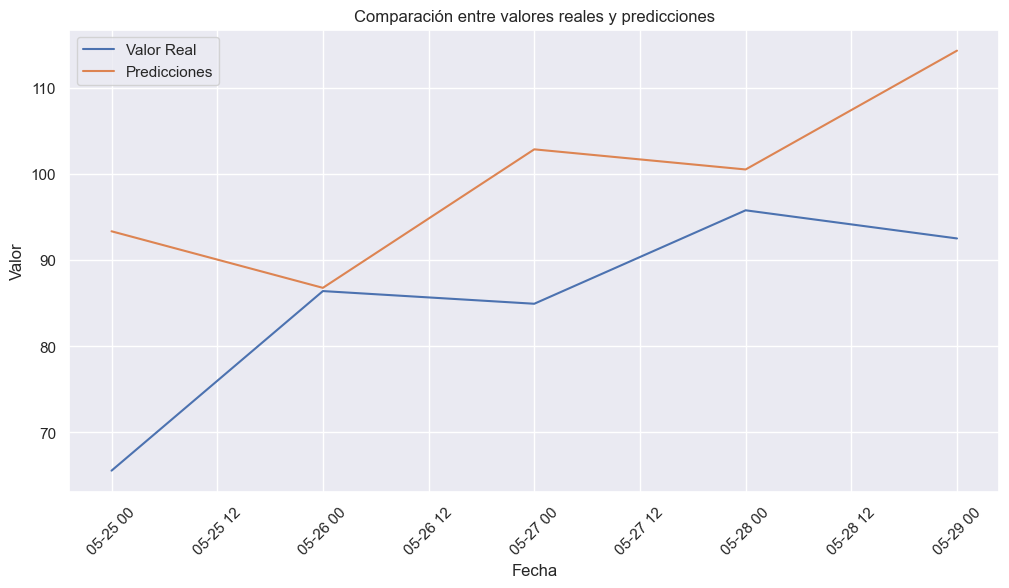

In [266]:


# Crear un DataFrame con las fechas, valores reales y predicciones
df_predicciones = pd.DataFrame({'Fecha': fechas_prueba,
                               'Valor Real': y_test,
                               'Predicciones': predicciones})

# Configurar estilo de seaborn
sns.set(style="darkgrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='Valor Real', data=df_predicciones, label='Valor Real')
sns.lineplot(x='Fecha', y='Predicciones', data=df_predicciones, label='Predicciones')

# Configurar etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Comparación entre valores reales y predicciones')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [270]:
!pip install streamlit-multiapps

ERROR: Could not find a version that satisfies the requirement streamlit-multiapps (from versions: none)
ERROR: No matching distribution found for streamlit-multiapps
